# Project Final Report: Hours Played vs. Likelyhood to Subscribe

### Names, student #:

- Cohen Prescod, 67109181
- Jeda Welle, 73383788
- Philip Jiang, 71930762


A research group in Computer Science at UBC, led by Frank Wood set up a MineCraft server and recorded the actions and various observations of players. They need to target their recruitment efforts and make sure they have enough resources to accommodate the number of players they attract.

**Players.csv**: A list of all unique players, 196 rows, 7 columns, includes variables:
- **experience**: character, shows how familiar a play is with the game
    - includes entries: amateur, beginner, regular, veteran, and pro.
- **subscribe**: logical, yes or no for if the player subscribed
- **hashedEmail**: character, string of characters that privately identify specific players' emails
- **played_hours**: Decimal Values, amount of time (hours) spent playing on this server
- **name**: character, name of player
- **gender**: character, gender of player
    - Consists of entries: male, female, non-binary, prefer not to say, two-spirited, Agender, and other.
- **age**: Decimal Values, age of player

## Questions

**Broad**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific**: Can the number of hours played predict subscription in player.csv?

**Justification**:
- The only two quantitative variables in data set are "age" and "played_hours", age has no correlation to subscription
- Other variables are all categorical, have not learned how to do this kind of classification in class
- Possible positive relationship between "player_hours" and likelihood to "subscribe"
- Many players who played 0 hours, may skew data, good to keep in mind

In [18]:
library(tidyverse)
library(repr)
library(tidymodels)

Read in the dataset!!!

In [19]:
players_URL<-"https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players<-read_csv(players_URL)
head(players)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


### Wrangling the data:
- Renamed variables for consistancy
- Removed all NAs (so they don't skew data)
- Changed subscribe into a factor (allows this to be used as a response variable in classification later)

In [20]:
players<- players|>
    rename(hashed_email=hashedEmail)|>
    mutate(subcribe=as.factor(subscribe))|>
    select(experience,subscribe,hashed_email,played_hours,name,gender,age)|>
    drop_na()|>
    select(subscribe, played_hours,age)

head(players)

subscribe,played_hours,age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


## Summary statistics

**subscribe**:
- Most players subscribed

In [22]:
subscribe_count<- players|>
    count(subscribe)|>
    arrange(desc(n))
subscribe_count

subscribe,n
<lgl>,<int>
TRUE,144
FALSE,52


**played_hours**:
- High number of players playing 0 hours raises a concern, possibly skewing statistics like mean and sd
- Large range of time played (0-223.1)
- Mean is 5.85 (on lower end)
- SD 28.36 hours (high deviation, varrying interest in game)

In [23]:
played_hours_count<-players|>
    count(played_hours)|>
    arrange(desc(n))
head(played_hours_count)

played_hours_min<-players|>
    summarize(min_played_hours=min(played_hours))
played_hours_min

played_hours_max<-players|>
    summarize(max_played_hours=max(played_hours))
played_hours_max

played_hours_mean<-players|>
    summarize(mean_played_hours=mean(played_hours,na.rm=TRUE))|>
    round(digits=2)
played_hours_mean

played_hours_sd<-players|>
    summarize(standard_deviation_played_hours=sd(played_hours,na.rm=TRUE))|>
    round(digits=2)
played_hours_sd

played_hours,n
<dbl>,<int>
0.0,85
0.1,34
0.2,10
1.0,6
0.3,5
0.4,5


min_played_hours
<dbl>
0


max_played_hours
<dbl>
223.1


mean_played_hours
<dbl>
5.85


standard_deviation_played_hours
<dbl>
28.36


**age**:
- 8-99 years old, standard deviation 9.71(wide variation of ages playing)
- Mean age about 21(younger end)

In [24]:
age_count<-players|>
    count(age)|>
    arrange(desc(n))
head(age_count)

age_min<-players|>
    summarize(min_age=min(age,na.rm=TRUE))
age_min

age_max<-players|>
    summarize(max_age=max(age,na.rm=TRUE))
age_max

age_mean<-players|>
    summarize(mean_age=mean(age,na.rm=TRUE))|>
    round(digits=2)
age_mean

age_sd<-players|>
    summarize(standard_deviation_age=sd(age,na.rm=TRUE))|>
    round(digits=2)

age_sd

age,n
<dbl>,<int>
17,75
21,18
22,15
20,14
23,13
24,10


min_age
<dbl>
8


max_age
<dbl>
99


mean_age
<dbl>
21.28


standard_deviation_age
<dbl>
9.71


## Exploratory Data Analysis and Visualization
#### Figure 1:
This graph depicts the Age of the player vs. the hours they played and is colored by suscbription, helping us visualize the relationships between both age and subscription as well as the hours played and subscription.
-  No correlation between age of a player and hours played (game appeals somewhat equally to all ages)
- No relationship between subscription and player’s age
- Possible positive relationship between played hours and subscription (as hours played increases, subscriptions increase (people not subscribing dreases))

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


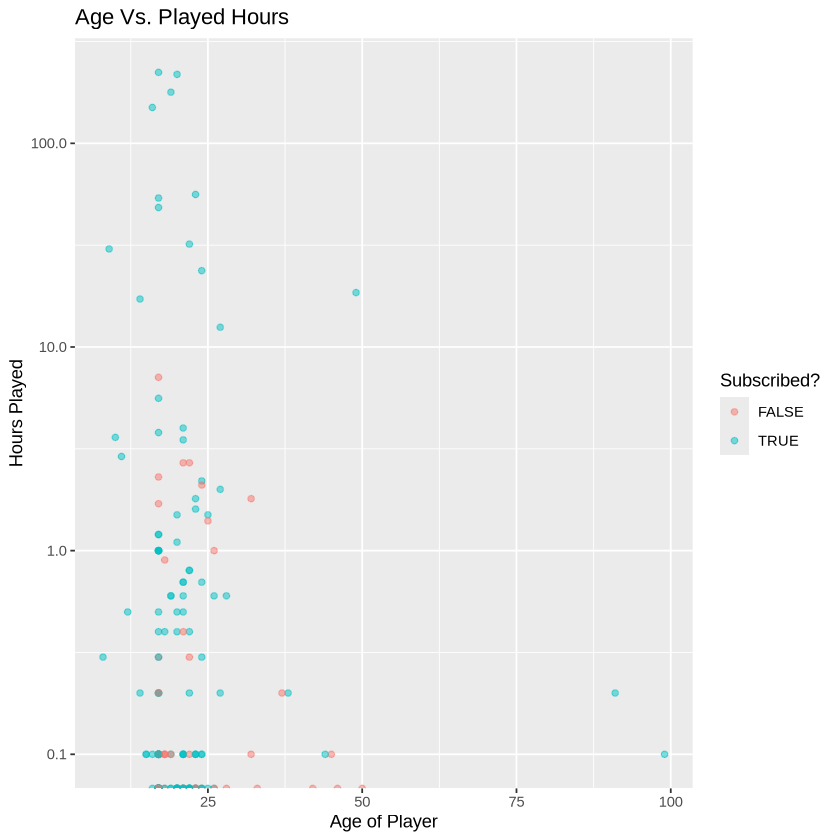

In [21]:
age_vs_played_hours <- players|>
    ggplot(aes(x=age, y=played_hours, color= subscribe))+
        geom_point(alpha=0.5) +
        scale_y_log10() +
        labs(x="Age of Player", y="Hours Played", color="Subscribed?")+
        ggtitle("Age Vs. Played Hours")

age_vs_played_hours

In [26]:
players<- players|>
    select(played_hours,subscribe)
head(players)

played_hours,subscribe
<dbl>,<lgl>
30.3,TRUE
3.8,TRUE
0.0,FALSE
0.7,TRUE
0.1,TRUE
0.0,TRUE
